In [15]:
import requests
url = "http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/pubid:17446270"

try:
    httpReq = requests.get(url, proxies=None)
except NameError:
    httpReq = requests.get(url)
ans = httpReq.text

In [16]:
print(ans)

uniprotkb:P0CW72	uniprotkb:P0CW72	intact:EBI-2620133|uniprotkb:Q777A5	intact:EBI-2620133|uniprotkb:Q777A5	psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)	psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)	psi-mi:"MI:0397"(two hybrid array)	Calderwood et al. (2007)	pubmed:17446270|imex:IM-20435|mint:MINT-6769080	taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")	taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")	psi-mi:"MI:0915"(physical association)	psi-mi:"MI:0469"(IntAct)	intact:EBI-2620961|imex:IM-20435-3	author score:+|intact-miscore:0.51
uniprotkb:P14348	uniprotkb:P0C704	intact:EBI-2620158|intact:EBI-9645437|uniprotkb:Q777G5	intact:EBI-2620975|uniprotkb:Q3KSQ5	psi-mi:scp_ebvb9(display_long)|uniprotkb:SCP(gene nam

In [17]:
import re

def mitabReader(httpText):
    for line in ans.split("\n"):
        _ = line.split("\t")
        if len(_) > 1 and _[0].startswith("uniprotkb:")\
                      and _[1].startswith("uniprotkb:"):
            yield [ _[0].replace("uniprotkb:", ""),\
                    _[1].replace("uniprotkb:", "") ]\
                  + _[2:]

In [18]:
it = mitabReader(ans)
for l in it:
    print(l)
# it is exhausted

mitab_list = { d for d in mitabReader (ans) }

['P0CW72', 'P0CW72', 'intact:EBI-2620133|uniprotkb:Q777A5', 'intact:EBI-2620133|uniprotkb:Q777A5', 'psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)', 'psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)', 'psi-mi:"MI:0397"(two hybrid array)', 'Calderwood et al. (2007)', 'pubmed:17446270|imex:IM-20435|mint:MINT-6769080', 'taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")', 'taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")', 'psi-mi:"MI:0915"(physical association)', 'psi-mi:"MI:0469"(IntAct)', 'intact:EBI-2620961|imex:IM-20435-3', 'author score:+|intact-miscore:0.51']
['P14348', 'P0C704', 'intact:EBI-2620158|intact:EBI-9645437|uniprotkb:Q777G5', 'intact:EBI-2620975|uniprotkb:Q3KSQ5', 'psi-mi:scp_ebvb9(display_long)|un

TypeError: unhashable type: 'list'

In [19]:
def isMitab_EBV_EBV(mitabArray):
    reEBV   = "taxid:(1037[6-7]|82830)"
    if re.search(reEBV, mitabArray[9]) and re.search(reEBV, mitabArray[10]):
        return True
    return False

In [27]:
def isMitab_Human_EBV(mitabLine):
    reSapiens = "taxid:9606"
    #c'est imposssible d'être 9 et 10 ensemble
    if re.search(reSapiens, mitabArray[9]) or re.search(reSapiens, mitabArray[10]):
        return True
    return False

In [37]:
EBV_EBV_mitab   = []
EBV_Human_mitab = []
total = 0

for mitabArray in mitabReader(ans):
    total += 1
    if isMitab_EBV_EBV(mitabArray):
        EBV_EBV_mitab.append(mitabArray)
    elif isMitab_Human_EBV(mitabArray):
        EBV_Human_mitab.append(mitabArray)
    else : 
        raise ValueError("Je ne connais pas cette espece ==> ", mitabArray[9:11])

In [38]:
print(f"Nombre total d'interactions {total}, EBV-EBV {len(EBV_EBV_mitab)}")

Nombre total d'interactions 230, EBV-EBV 59


In [39]:
EBV_protein = set()
for mitab in EBV_EBV_mitab:
    EBV_protein.add(mitab [0])
    EBV_protein.add(mitab [1])
    
EBV_human = set()
for mitab in EBV_Human_mitab:
    # Check if Ist partner is human
    if "tax1d:9606" in mitab[9]:
        EBV_human.add(mitab[0]) # push ist partner in set 
        EBV_protein.add(mitab[1])
    else:
        EBV_human.add(mitab[1]) # The 2nd partner must be human
        EBV_protein.add(mitab[0])
        
print(f"Nb EBV proteins in EBV-EBV data set is {len(EBV_protein) }")
print(f"Nb EBV proteins in EBV-Human data set is {len(EBV_human)}")

Nb EBV proteins in EBV-EBV data set is 129
Nb EBV proteins in EBV-Human data set is 89


[('a', 'b'), ('b', 'c')] ['a', 'b', 'c']


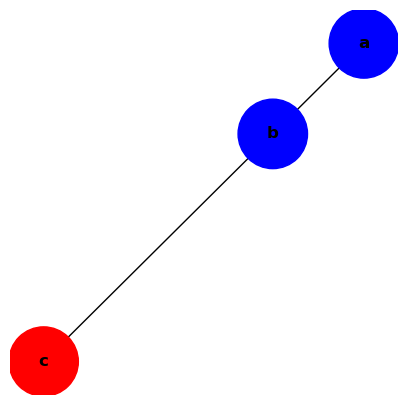

In [68]:
# Generate host figure
from matplotlib import pyplot as plt
fig, host_ax = plt.subplots(figsize=(5,5))
host_ax.set_axis_off()

#%pip install networkx 
import networkx as nx
G = nx.Graph()

G.add_edge("a", "b",weight=12, scope="book")
G.add_edge("b", "c")

#Gadd_edges_from ([(1, 2), (1, 3)])

print(G.edges(),G.nodes())

#%pip install matplotlib
nodes_pos_dict = nx.spring_layout(G,k=0.3)
nx.draw(G,ax=host_ax,pos=nodes_pos_dict,
        node_size=2500, node_color=["blue","blue","red"],
        with_labels=True, font_weight='bold')